In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

In [ ]:
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

In [ ]:
m = len(x_train)
print(f"Number of training examples is: {m}")

In [ ]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

In [ ]:
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [ ]:
def model_compute(x_train,w,b):
    m = x_train.shape[0]
    y_hat = np.zeros(m)
    for i in range(m):
        y_hat[i] = w * x_train[i] + b
    return y_hat

In [ ]:
tmp_f_wb = model_compute(x_train, 200, 100,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [ ]:
def compute_cost(x, y, w, b): 
    m = x.shape[0]  
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data (non-linear)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 4, 9, 16, 25])  # Clearly quadratic

# Polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # adds x^2 column

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict
X_test = np.linspace(1, 5, 100).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Plot
plt.scatter(X, y, color='red', label='Original Data')
plt.plot(X_test, y_pred, label='Polynomial Fit')
plt.legend()
plt.title("Polynomial Regression (degree=2)")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Corrected: specify informative and redundant features explicitly
X, y = make_classification(
    n_samples=100, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    n_classes=2, 
    random_state=1
)

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='bwr', alpha=0.7)
plt.title("Logistic Regression Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a dataset with many features (some redundant/irrelevant)
X, y = make_classification(
    n_samples=200, 
    n_features=20, 
    n_informative=5, 
    n_redundant=2, 
    n_repeated=0, 
    n_classes=2, 
    random_state=42, 
    shuffle=False
)

# Logistic Regression with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(X, y)
weights_l1 = model_l1.coef_[0]

# Logistic Regression with L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(X, y)
weights_l2 = model_l2.coef_[0]

# Plot the weights
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(weights_l1)) - 0.2, weights_l1, width=0.4, label='L1 Regularization')
plt.bar(np.arange(len(weights_l2)) + 0.2, weights_l2, width=0.4, label='L2 Regularization')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Comparison of Feature Weights: L1 vs L2 Regularization")
plt.xlabel("Feature Index")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### DEEP LEARNING ( NEURAL NETWORKS) FROM SCRATCH


In [2]:
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Input dimension and hidden layer size
input_size = 2
hidden_size = 2
output_size = 1

# 4 simple points with 2 inputs each
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Corresponding labels
y = np.array([[0], [1], [1], [0]])  # XOR-like

W1 = np.random.randn(hidden_size, input_size)
b1 = np.zeros((hidden_size, 1))

W2 = np.random.randn(output_size, hidden_size)
b2 = np.zeros((output_size, 1))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

lr = 0.1
epochs = 10000

for epoch in range(epochs):
    loss = 0
    for i in range(len(X)):
        # ----------- Forward Pass -----------
        x = X[i].reshape(-1, 1)
        target = y[i]

        z1 = W1 @ x + b1
        a1 = relu(z1)

        z2 = W2 @ a1 + b2
        a2 = sigmoid(z2)  # final output = prediction

        # Binary Cross-Entropy Loss
        loss += - (target * np.log(a2) + (1 - target) * np.log(1 - a2))

        # ----------- Backward Pass -----------
        dz2 = a2 - target  # (1x1)
        dW2 = dz2 @ a1.T   # (1x2)
        db2 = dz2

        da1 = W2.T @ dz2            # (2x1)
        dz1 = da1 * relu_derivative(z1)  # (2x1)
        dW1 = dz1 @ x.T             # (2x2)
        db1 = dz1

        # ----------- Update Weights -----------
        W2 -= lr * dW2
        b2 -= lr * db2

        W1 -= lr * dW1
        b1 -= lr * db1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


print("\nPredictions:")
for i in range(len(X)):
    x = X[i].reshape(-1, 1)
    z1 = W1 @ x + b1
    a1 = relu(z1)
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    print(f"Input: {X[i]}, Predicted: {a2[0][0]:.4f}")


Epoch 0, Loss: 2.9897
Epoch 1000, Loss: 1.9452
Epoch 2000, Loss: 1.9440
Epoch 3000, Loss: 1.9437
Epoch 4000, Loss: 1.9438
Epoch 5000, Loss: 1.9436
Epoch 6000, Loss: 1.9435
Epoch 7000, Loss: 1.9435
Epoch 8000, Loss: 1.9435
Epoch 9000, Loss: 1.9435

Predictions:
Input: [0 0], Predicted: 0.6741
Input: [0 1], Predicted: 0.6741
Input: [1 0], Predicted: 0.6741
Input: [1 1], Predicted: 0.0002


In [1]:
import numpy as np

# ----- 1. Data Preparation -----
X = np.array([[1, 2],
              [1, -1],
              [-1, 2],
              [-2, -1]]).T  # shape: (2, 4)

y_true = np.array([0, 1, 2, 1])
def one_hot(labels, num_classes):
    return np.eye(num_classes)[labels].T

Y = one_hot(y_true, 3)  # shape: (3, 4)

# ----- 2. Initialize Parameters -----
np.random.seed(42)
n_x = 2    # input features
n_h = 5    # hidden layer size
n_y = 3    # number of classes

W1 = np.random.randn(n_h, n_x) * 0.01
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_y, n_h) * 0.01
b2 = np.zeros((n_y, 1))

# ----- 3. Activation Functions -----
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shift)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

# ----- 4. Training Loop -----
lr = 0.1
epochs = 10000

for epoch in range(epochs):
    # Forward pass
    Z1 = W1 @ X + b1         # (5, 4)
    A1 = relu(Z1)            # (5, 4)
    Z2 = W2 @ A1 + b2        # (3, 4)
    A2 = softmax(Z2)         # (3, 4)

    # Loss (cross-entropy)
    m = Y.shape[1]
    loss = -np.sum(Y * np.log(A2 + 1e-15)) / m

    # Backward pass
    dZ2 = A2 - Y             # (3, 4)
    dW2 = (1/m) * dZ2 @ A1.T # (3, 5)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  # (3, 1)

    dA1 = W2.T @ dZ2         # (5, 4)
    dZ1 = dA1 * relu_derivative(Z1)  # (5, 4)
    dW1 = (1/m) * dZ1 @ X.T  # (5, 2)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  # (5, 1)

    # Update weights
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Final predictions
Z1 = W1 @ X + b1
A1 = relu(Z1)
Z2 = W2 @ A1 + b2
A2 = softmax(Z2)
predictions = np.argmax(A2, axis=0)
predictions


Epoch 0, Loss: 1.0986
Epoch 1000, Loss: 0.0025
Epoch 2000, Loss: 0.0009
Epoch 3000, Loss: 0.0005
Epoch 4000, Loss: 0.0004
Epoch 5000, Loss: 0.0003
Epoch 6000, Loss: 0.0002
Epoch 7000, Loss: 0.0002
Epoch 8000, Loss: 0.0002
Epoch 9000, Loss: 0.0001


array([0, 1, 2, 1])

In [2]:
import tensorflow as tf

# Scalars (0D)
scalar = tf.constant(5)
print("Scalar:", scalar)

# Vector (1D)
vector = tf.constant([1.0, 2.0, 3.0])
print("Vector:", vector)

# Matrix (2D)
matrix = tf.constant([[1, 2], [3, 4]])
print("Matrix:\n", matrix)

# 3D Tensor
tensor3d = tf.constant([[[1], [2]], [[3], [4]]])
print("3D Tensor:\n", tensor3d)


Scalar: tf.Tensor(5, shape=(), dtype=int32)
Vector: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
Matrix:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
3D Tensor:
 tf.Tensor(
[[[1]
  [2]]

 [[3]
  [4]]], shape=(2, 2, 1), dtype=int32)


In [3]:
w = tf.Variable(3.0)   # This can change and be updated by gradient descent
x = tf.constant(2.0)   # This stays fixed

In [4]:
import tensorflow as tf

w = tf.Variable(3.0)
x = tf.constant(2.0)

with tf.GradientTape() as tape:
    y = w * x**2  # y = 3 * 4 = 12

# Get dy/dw
grad = tape.gradient(y, w)
print("Gradient dy/dw:", grad.numpy())  # Should be 4.0

Gradient dy/dw: 4.0


In [9]:
w = tf.Variable(2.0)
b = tf.Variable(9.0)
x = tf.constant(3.0)

with tf.GradientTape() as tape:
    y = w * x + b  # y = 2*3 + 1 = 7

grads = tape.gradient(y, [w, b])
print("dy/dw:", grads[0].numpy())  # Should be 3
print("dy/db:", grads[1].numpy())  # Should be 1

dy/dw: 3.0
dy/db: 1.0


In [10]:
import tensorflow as tf
import numpy as np

# Generate synthetic data: y = 3x + 2 + noise
X = np.linspace(0, 5, 50)
Y = 3 * X + 2 + np.random.randn(*X.shape) * 0.5  # adding noise

# Convert to tensors
X = tf.constant(X, dtype=tf.float32)
Y = tf.constant(Y, dtype=tf.float32)

# Random initial values
w = tf.Variable(tf.random.normal([]))
b = tf.Variable(tf.random.normal([]))

lr = 0.01  # learning rate
epochs = 100

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = w * X + b
        loss = tf.reduce_mean(tf.square(y_pred - Y))  # MSE

    dw, db = tape.gradient(loss, [w, b])
    
    # Manual gradient descent
    w.assign_sub(lr * dw)
    b.assign_sub(lr * db)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.numpy():.4f} | w: {w.numpy():.2f} | b: {b.numpy():.2f}")


Epoch 000 | Loss: 183.4049 | w: 0.06 | b: -0.84
Epoch 010 | Loss: 3.9911 | w: 3.06 | b: 0.15
Epoch 020 | Loss: 0.8362 | w: 3.44 | b: 0.35
Epoch 030 | Loss: 0.7322 | w: 3.47 | b: 0.43
Epoch 040 | Loss: 0.6854 | w: 3.46 | b: 0.50
Epoch 050 | Loss: 0.6437 | w: 3.44 | b: 0.56
Epoch 060 | Loss: 0.6058 | w: 3.42 | b: 0.62
Epoch 070 | Loss: 0.5713 | w: 3.40 | b: 0.67
Epoch 080 | Loss: 0.5399 | w: 3.39 | b: 0.73
Epoch 090 | Loss: 0.5114 | w: 3.37 | b: 0.78


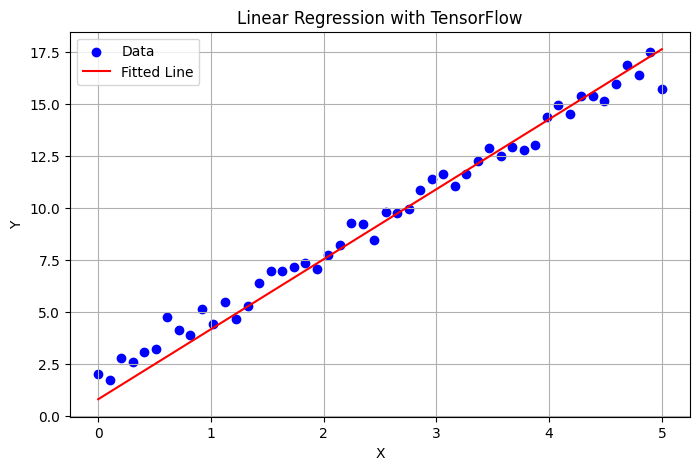

In [11]:
import matplotlib.pyplot as plt

# Predicted line
y_pred = w * X + b

plt.figure(figsize=(8, 5))
plt.scatter(X, Y, label='Data', color='blue')
plt.plot(X, y_pred, label='Fitted Line', color='red')
plt.title("Linear Regression with TensorFlow")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


### Using Tensorflow to train a simple NN

In [20]:
import tensorflow as tf, numpy as np, random
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
# XOR inputs and labels
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]], dtype=np.float32)

y = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='tanh', input_shape=(2,)),  # Hidden layer (4 neurons)
    tf.keras.layers.Dense(1, activation='sigmoid')                  # Output layer
])

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(X, y, epochs=1000, verbose=0,batch_size=4)

In [26]:
# Evaluate accuracy
loss, acc = model.evaluate(X, y)
print(f"Accuracy: {acc:.2f}")

# Predict
preds = model.predict(X)
print("Predictions:", np.round(preds).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 1.0000 - loss: 0.2535
Accuracy: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predictions: [0. 1. 1. 0.]


## Neural Network on a Real Dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

# Load data
data = load_iris()
X = data.data         # shape (150, 4)
y = data.target       # shape (150,) with labels 0, 1, 2

# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes=3)

# Normalize inputs
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),  # 1 hidden layer
    tf.keras.layers.Dense(3, activation='softmax')                   # 3-class output
])

d:\MY WORK\Python\Basic-Models\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5182 - loss: 1.0813 - val_accuracy: 0.3750 - val_loss: 1.1874
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5467 - loss: 1.0573 - val_accuracy: 0.4167 - val_loss: 1.1436
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5901 - loss: 1.0025 - val_accuracy: 0.4167 - val_loss: 1.1044
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5583 - loss: 0.9296 - val_accuracy: 0.4167 - val_loss: 1.0703
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5983 - loss: 0.8827 - val_accuracy: 0.4167 - val_loss: 1.0346
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6286 - loss: 0.8666 - val_accuracy: 0.4583 - val_loss: 1.0069
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6477 - loss: 0.8695 - val_accuracy: 0.4583 - val_loss: 0.9781
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6067 - loss: 0.8544 - val_accuracy: 0.4583 - 

In [5]:
# Evaluate test accuracy
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.2f}")

# Predict on test data
preds = model.predict(X_test)
predicted_classes = np.argmax(preds, axis=1)
print("Predicted classes:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 1.0000 - loss: 0.1600
Test accuracy: 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Predicted classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## MNIST DATA SET NN

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–1 range)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten 28x28 images into 784-length vectors
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train_cat,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=32)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8673 - loss: 0.4713 - val_accuracy: 0.9519 - val_loss: 0.1656
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9592 - loss: 0.1400 - val_accuracy: 0.9642 - val_loss: 0.1167
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9732 - loss: 0.0887 - val_accuracy: 0.9701 - val_loss: 0.0991
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9818 - loss: 0.0646 - val_accuracy: 0.9722 - val_loss: 0.0918
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9857 - loss: 0.0485 - val_accuracy: 0.9720 - val_loss: 0.0902


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0904
Test Accuracy: 0.9750


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


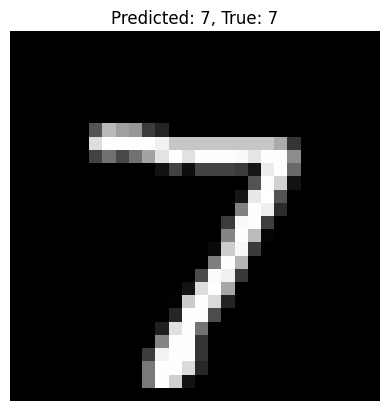

In [17]:
import numpy as np

preds = model.predict(x_test)
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(preds[0])}, True: {y_test[0]}")
plt.axis('off')
plt.show()

## DEEP MLP

In [18]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=64)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8600 - loss: 0.4773 - val_accuracy: 0.9597 - val_loss: 0.1297
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9661 - loss: 0.1091 - val_accuracy: 0.9655 - val_loss: 0.1119
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9796 - loss: 0.0670 - val_accuracy: 0.9711 - val_loss: 0.0961
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9857 - loss: 0.0463 - val_accuracy: 0.9731 - val_loss: 0.0933
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9880 - loss: 0.0351 - val_accuracy: 0.9743 - val_loss: 0.0931
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9897 - loss: 0.0311 - val_accuracy: 0.9748 - val_loss: 0.0949
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9920 - loss: 0.0238 - val_accuracy: 0.9762 - val_loss: 0.0936
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9726 - loss: 0.0990
Test Accuracy: 0.9778


## CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension: (28, 28) → (28, 28, 1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

d:\MY WORK\Python\Basic-Models\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
history = model.fit(x_train, y_train_cat,
                    epochs=5,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8608 - loss: 0.4792 - val_accuracy: 0.9808 - val_loss: 0.0665
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9806 - loss: 0.0600 - val_accuracy: 0.9856 - val_loss: 0.0517
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9873 - loss: 0.0402 - val_accuracy: 0.9864 - val_loss: 0.0516
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.9891 - val_loss: 0.0401
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9930 - loss: 0.0231 - val_accuracy: 0.9874 - val_loss: 0.0458


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9858 - loss: 0.0420

Test Accuracy: 0.9879


## Transfer Learning

In [11]:
import tensorflow as tf
import numpy as np

# Load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Reduce to a binary classification (e.g., cats vs dogs: label 3 = cat, 5 = dog)
# Filter only cats (label 3) and dogs (label 5)
train_filter = np.where((y_train == 3) | (y_train == 5))[0]
test_filter = np.where((y_test == 3) | (y_test == 5))[0]

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Convert labels: 3 -> 0 (cat), 5 -> 1 (dog)
y_train = (y_train == 5).astype(np.int32)
y_test = (y_test == 5).astype(np.int32)

In [12]:
# Define preprocess function
def preprocess(image, label):
    image = tf.image.resize(image, [160, 160])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Prepare TensorFlow datasets with preprocessing
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

In [13]:
# Load base model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False


In [14]:
# Add classification head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [15]:
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train
history = model.fit(train_ds, validation_data=test_ds, epochs=3)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 117s 339ms/step - accuracy: 0.7317 - loss: 0.5173 - val_accuracy: 0.8260 - val_loss: 0.3781
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 100s 318ms/step - accuracy: 0.8396 - loss: 0.3604 - val_accuracy: 0.8345 - val_loss: 0.3667
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 100s 319ms/step - accuracy: 0.8514 - loss: 0.3414 - val_accuracy: 0.8375 - val_loss: 0.3624


In [7]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - accuracy: 0.8380 - loss: 0.3728
Test Accuracy: 83.25%


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


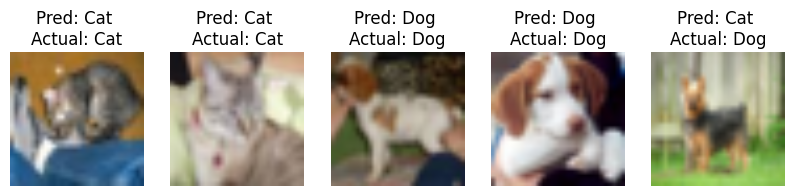

In [17]:
import matplotlib.pyplot as plt

# Get some test images and labels
for images, labels in test_ds.take(1):  # Take first batch
    preds = model.predict(images)
    preds = tf.squeeze(tf.round(preds))  # Round sigmoid output to 0 or 1
    break

# Map 0 -> Cat, 1 -> Dog
class_names = ["Cat", "Dog"]

# Plot first 5 predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].numpy())
    plt.title(f"Pred: {class_names[int(preds[i])]} \nActual: {class_names[int(labels[i])]}")
    plt.axis("off")
plt.show()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Gather all predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = tf.round(model.predict(images))
    y_pred.extend(tf.squeeze(preds).numpy())
    y_true.extend(tf.squeeze(labels).numpy())

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

#### Now lets unfreeze and fine-tune

In [19]:
# Unfreeze top layers of the base model
base_model.trainable = True

# Freeze all layers except the last 30
fine_tune_at = len(base_model.layers) - 30
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [23]:
# Recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Continue training
fine_tune_epochs = 5  # You can increase this later
history_fine = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=fine_tune_epochs
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 154s 458ms/step - accuracy: 0.8039 - loss: 0.4217 - val_accuracy: 0.8375 - val_loss: 0.3696
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 131s 417ms/step - accuracy: 0.8649 - loss: 0.3039 - val_accuracy: 0.8440 - val_loss: 0.3599
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 470ms/step - accuracy: 0.8946 - loss: 0.2496 - val_accuracy: 0.8490 - val_loss: 0.3483
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 456ms/step - accuracy: 0.9229 - loss: 0.2075 - val_accuracy: 0.8510 - val_loss: 0.3411
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 156s 499ms/step - accuracy: 0.9445 - loss: 0.1725 - val_accuracy: 0.8540 - val_loss: 0.3369


In [25]:
# Evaluate again
loss, accuracy = model.evaluate(test_ds)
print(f"Fine-tuned model accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.8609 - loss: 0.3319
Fine-tuned model accuracy: 85.40%


#### Lets finetune it a bit more

In [26]:
# Unfreeze top 70 layers of the base model
for layer in base_model.layers[-70:]:
    layer.trainable = True

# Recompile with a smaller learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [27]:
# Train again
fine_tune_epochs = 5  # You can change this
history_fine_2 = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=fine_tune_epochs
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 581ms/step - accuracy: 0.8410 - loss: 0.3503 - val_accuracy: 0.8605 - val_loss: 0.3380
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 184s 589ms/step - accuracy: 0.9145 - loss: 0.2150 - val_accuracy: 0.8635 - val_loss: 0.3275
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 179s 573ms/step - accuracy: 0.9501 - loss: 0.1522 - val_accuracy: 0.8675 - val_loss: 0.3262
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 180s 574ms/step - accuracy: 0.9733 - loss: 0.1071 - val_accuracy: 0.8700 - val_loss: 0.3279
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 181s 577ms/step - accuracy: 0.9885 - loss: 0.0737 - val_accuracy: 0.8745 - val_loss: 0.3336


In [28]:
# Evaluate again
loss, accuracy = model.evaluate(test_ds)
print(f"Fine-tuned model accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.8860 - loss: 0.3248
Fine-tuned model accuracy: 87.45%


## NLP

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
text = "Apple is looking at buying U.K. startup for $1 billion in 2025!"
doc = nlp(text)

In [6]:
tokens = [token.text.lower() for token in doc]
print(tokens)

['apple', 'is', 'looking', 'at', 'buying', 'u.k.', 'startup', 'for', '$', '1', 'billion', 'in', '2025', '!']


In [7]:
filtered_tokens = [token.text for token in doc if token.text.lower() not in STOP_WORDS]
print(filtered_tokens)

['Apple', 'looking', 'buying', 'U.K.', 'startup', '$', '1', 'billion', '2025', '!']


In [8]:
lemmas = [token.lemma_ for token in doc if token.text.lower() not in STOP_WORDS]
print(lemmas)

['Apple', 'look', 'buy', 'U.K.', 'startup', '$', '1', 'billion', '2025', '!']


In [9]:
for token in doc:
    print(f"{token.text:<10} - {token.pos_}")

Apple      - PROPN
is         - AUX
looking    - VERB
at         - ADP
buying     - VERB
U.K.       - PROPN
startup    - VERB
for        - ADP
$          - SYM
1          - NUM
billion    - NUM
in         - ADP
2025       - NUM
!          - PUNCT


In [10]:
for ent in doc.ents:
    print(ent.text, "->", ent.label_)

Apple -> ORG
U.K. -> GPE
$1 billion -> MONEY
2025 -> DATE


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

sentences = [["the", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]]

# Train Skip-Gram
model_sg = Word2Vec(sentences, vector_size=100, window=2, sg=1, min_count=1)

# Train CBOW
model_cb = Word2Vec(sentences, vector_size=100, window=2, sg=0, min_count=1)

# Get embedding
vector = model_sg.wv["fox"]

In [2]:
print(vector)

[-8.7274825e-03  2.1301615e-03 -8.7354420e-04 -9.3190884e-03
 -9.4281426e-03 -1.4107180e-03  4.4324086e-03  3.7040710e-03
 -6.4986930e-03 -6.8730675e-03 -4.9994122e-03 -2.2868442e-03
 -7.2502876e-03 -9.6033178e-03 -2.7436293e-03 -8.3628409e-03
 -6.0388758e-03 -5.6709289e-03 -2.3441375e-03 -1.7069972e-03
 -8.9569986e-03 -7.3519943e-04  8.1525063e-03  7.6904297e-03
 -7.2061159e-03 -3.6668312e-03  3.1185520e-03 -9.5707225e-03
  1.4764392e-03  6.5244664e-03  5.7464195e-03 -8.7630618e-03
 -4.5171441e-03 -8.1401607e-03  4.5956374e-05  9.2636338e-03
  5.9733056e-03  5.0673080e-03  5.0610625e-03 -3.2429171e-03
  9.5521836e-03 -7.3564244e-03 -7.2703874e-03 -2.2653891e-03
 -7.7856064e-04 -3.2161034e-03 -5.9258583e-04  7.4888230e-03
 -6.9751858e-04 -1.6249407e-03  2.7443992e-03 -8.3591007e-03
  7.8558037e-03  8.5361041e-03 -9.5840869e-03  2.4462664e-03
  9.9049713e-03 -7.6658037e-03 -6.9669187e-03 -7.7365171e-03
  8.3959233e-03 -6.8133592e-04  9.1444086e-03 -8.1582209e-03
  3.7430846e-03  2.63504

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Make sure the required NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize required components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    """
    Cleans input text string using the following steps:
    1. Lowercasing
    2. Removing HTML tags
    3. Removing URLs
    4. Removing punctuation
    5. Removing numbers
    6. Tokenization
    7. Stopword removal
    8. Lemmatization
    Returns: List of clean tokens
    """
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # 3. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # 4. Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # 5. Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # 6. Tokenize
    tokens = word_tokenize(text)
    
    # 7. Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # 8. Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    return lemmatized_tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oumme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumme\AppData\Roaming\nltk_data...


In [6]:
sample = "The <b>quick</b> brown fox, aged 5, jumped over http://example.com the lazy dog!"
print(clean_text(sample))

['quick', 'brown', 'fox', 'aged', 'jumped', 'lazy', 'dog']
